# Task 1

Load and clean the data (handle Missing values marked “?”)

In [1]:
import pandas as pd
import numpy as np

In [3]:
Data=pd.read_csv("diabetic_data.csv")

In [5]:
print(Data.shape)

(101766, 50)


In [7]:
print(type(Data.iloc[0,5]))

<class 'str'>


In [9]:
if Data.iloc[0,5]=="?":
    print("yes")
else:
    print("No")

yes


In [34]:
print(Data.shape[0])
print(Data.shape[1])

101766
50


In [11]:
CountQuest = (Data == "?").sum().sum()
print(f'Sum of all "?" within database is: {CountQuest}')


Sum of all "?" within database is: 192849


In [40]:
SumQ=0
for i in range(Data.shape[0]):
    for j in range(Data.shape[1]):
        if Data.iloc[i,j]=="?":
            SumQ=SumQ+1
print(f'Sum of all "?" within database is: {SumQ}') 

Sum of all "?" within database is: 192849


In [15]:
print(Data.isnull().sum().sum())

181168


In [19]:
print(pd.isna(Data).sum().sum())


181168


In [33]:
print((Data.iloc[:2, 3:8]))

   gender      age weight  admission_type_id  discharge_disposition_id
0  Female   [0-10)      ?                  6                        25
1  Female  [10-20)      ?                  1                         1


In [31]:
print(pd.isna(Data.iloc[:2, 3:8]))

   gender    age  weight  admission_type_id  discharge_disposition_id
0   False  False   False              False                     False
1   False  False   False              False                     False


In [5]:
Data.replace("?",np.nan,inplace=True)

In [37]:
print(pd.isna(Data.iloc[:2, 3:8]))

   gender    age  weight  admission_type_id  discharge_disposition_id
0   False  False    True              False                     False
1   False  False    True              False                     False


# Task 2

Encode ICD-9 text descriptions

In [62]:
print(Data.iloc[:2, [18,19,20]])

   diag_1  diag_2 diag_3
0  250.83     NaN    NaN
1     276  250.01    255


In [78]:

if float(Data.iloc[0, 19])>300:
    print("Higher")
else:
    print("Lesser")

Lesser


In [7]:
DDat=Data.copy() # Make a copy from original data

In [9]:
def ClassDetection(Cell):
    try:
        Cell=float(Cell)
    except:
        return "other"
    
    if     1<= Cell<= 139:
        return "infectious"
    elif 140<= Cell<= 239:
        return "neoplasms"
    elif 240<= Cell<= 279:
        return "endocrine"
    elif 280<= Cell<= 289:
        return "blood"
    elif 290<= Cell<= 319:
        return "mental"
    elif 320<= Cell<= 389:
        return "nervous"
    elif 390<= Cell<= 459:
        return "cirulatory"
    elif 460<= Cell<= 519:
        return "respiratory"
    elif 520<= Cell<= 579:
        return "digestive"
    elif 580<= Cell<= 629:
        return "genitourinary"
    elif 630<= Cell<= 679:
        return "pregnancy"
    elif 680<= Cell<= 709:
        return "skin"
    elif 710<= Cell<= 739:
        return "musculoskeletal"
    elif 740<= Cell<= 759:
        return "congenital"
    elif 760<= Cell<= 779:
        return "perinatal"
    elif 780<= Cell<= 799:
        return "ill-defined"
    elif 800<= Cell<= 999:
        return "injury"
    else:
        return "other"

In [94]:
ClassDetection("de3")

'other'

In [11]:
for j in [18,19,20]:
    DDat.iloc[:,j]=DDat.iloc[:,j].apply(ClassDetection)

In [102]:
print(Data.iloc[:5, [18,19,20]])     # Before ICD-9

   diag_1  diag_2 diag_3
0  250.83     NaN    NaN
1     276  250.01    255
2     648     250    V27
3       8  250.43    403
4     197     157    250


In [100]:
print(DDat.iloc[:5, [18,19,20]])     # After ICD-9

       diag_1     diag_2      diag_3
0   endocrine      other       other
1   endocrine  endocrine   endocrine
2   pregnancy  endocrine       other
3  infectious  endocrine  cirulatory
4   neoplasms  neoplasms   endocrine


# Export Data

In [16]:
Data.to_csv('Data.csv',index=False)
DDat.to_csv('DDat.csv',index=False)

# Task 3

Build a model to predict whether a patient is readmitted within 30 days.

### Technical investigation

In [1]:
import pandas as pd
import numpy as np

In [3]:
DDat=pd.read_csv('DDat.csv',low_memory=False)

In [5]:
print(DDat.shape)

(101766, 50)


In [7]:
Data=DDat[['gender','age','diag_1','diag_2','diag_3','readmitted']].copy()

In [9]:
print(Data.shape)
print(Data.iloc[0,0], ' type ',type(Data.iloc[0,0]))
print(Data.iloc[0,1], ' type ',type(Data.iloc[0,0]))
print(Data.iloc[0,2], ' type ',type(Data.iloc[0,0]))
print(Data.iloc[0,3], ' type ',type(Data.iloc[0,0]))
print(Data.iloc[0,4], ' type ',type(Data.iloc[0,0]))
print(Data.iloc[1,5], ' type ',type(Data.iloc[0,0]))

(101766, 6)
Female  type  <class 'str'>
[0-10)  type  <class 'str'>
endocrine  type  <class 'str'>
other  type  <class 'str'>
other  type  <class 'str'>
>30  type  <class 'str'>


        gender      age      diag_1         diag_2       diag_3 readmitted
0       Female   [0-10)   endocrine          other        other         NO
1       Female  [10-20)   endocrine      endocrine    endocrine        >30
2       Female  [20-30)   pregnancy      endocrine        other         NO
3         Male  [30-40)  infectious      endocrine   cirulatory         NO
4         Male  [40-50)   neoplasms      neoplasms    endocrine         NO
...        ...      ...         ...            ...          ...        ...
101761    Male  [70-80)   endocrine         mental   cirulatory        >30
101762  Female  [80-90)   digestive      endocrine  ill-defined         NO
101763    Male  [70-80)  infectious  genitourinary       mental         NO
101764  Female  [80-90)      injury          blood       injury         NO
101765    Male  [70-80)   digestive      digestive  ill-defined         NO

[101766 rows x 6 columns]


In [13]:
def ReAdmit(Str):
    try:
        Str=str(Str)
    except:
        return 5
    
    if   Str=="NO":
        return 0
    elif Str=="<30":
        return 1
    elif Str==">30":
        return 2

In [15]:
Data['readmitted']=Data['readmitted'].apply(ReAdmit)

In [75]:
Data['readmitted'].value_counts().get(5, 0)

0

In [138]:
print("How many times does 'NO' admission exist? ",Data['readmitted'].value_counts().get(0, 0),
        ' Probability of occurrence: ', round(100*Data['readmitted'].value_counts().get(0, 0)/Data.shape[0],2))

print("How many times does '<30' admission exist? ",Data['readmitted'].value_counts().get(1, 0),
        ' Probability of occurrence: ', round(100*Data['readmitted'].value_counts().get(1, 0)/Data.shape[0],2))

print("How many times does '>30' admission exist? ",Data['readmitted'].value_counts().get(2, 0),
        ' Probability of occurrence: ', round(100*Data['readmitted'].value_counts().get(2, 0)/Data.shape[0],2))

How many times does 'NO' admission exist?  54864  Probability of occurrence:  53.91
How many times does '<30' admission exist?  11357  Probability of occurrence:  11.16
How many times does '>30' admission exist?  35545  Probability of occurrence:  34.93


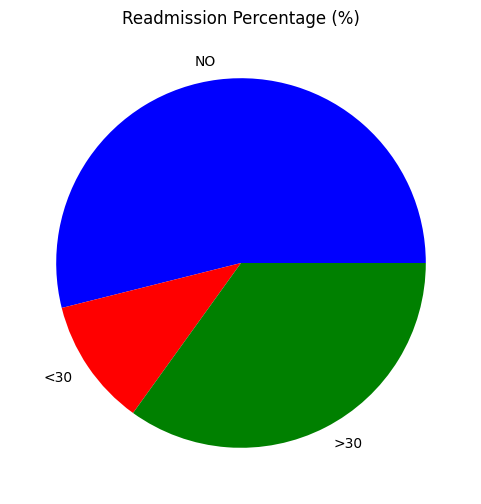

In [115]:
import matplotlib.pyplot as plt

ReAdmit_Dic = {
    'NO': Data['readmitted'].value_counts().get(0, 0),
    '<30': Data['readmitted'].value_counts().get(1, 0),
    '>30': Data['readmitted'].value_counts().get(2, 0)
}
PieFig=plt.figure(figsize=(6, 6))
plt.pie(ReAdmit_Dic.values(),labels=ReAdmit_Dic.keys(), colors=['blue','red','green'])
plt.title('Readmission Percentage (%)')
plt.show()
PieFig.savefig('PieFig.png', dpi=300,bbox_inches='tight')



In [17]:
def Gender(Str):
    try:
        Str=str(Str)
    except:
        return 5
    
    if   Str=="Female":
        return 1
    elif Str=="Male":
        return 2
    else:
        return 5

In [19]:
Data['gender']=Data['gender'].apply(Gender)

In [122]:
Data['gender']

0         1
1         1
2         1
3         2
4         2
         ..
101761    2
101762    1
101763    2
101764    1
101765    2
Name: gender, Length: 101766, dtype: int64

In [134]:
print("How many times are 'Female' checked by doctors? ",Data['gender'].value_counts().get(1, 0),
        ' Probability of occurance: ', round(100*Data['gender'].value_counts().get(1, 0)/Data.shape[0],2))

print("How many times are 'Female' checked by doctors? ",Data['gender'].value_counts().get(2, 0),
        ' Probability of occurance: ', round(100*Data['gender'].value_counts().get(2, 0)/Data.shape[0],2))


How many times does 'Female' check by doctors?  54708  Probability of occurance:  53.76
How many time does exist '<30' admission?  47055  Probability of occurance:  46.24


#### save Data

In [27]:
Data.to_csv('Data.csv',index=False)

#### load Data

In [ ]:
Data=pd.read_csv('Data.csv',low_memory=False)

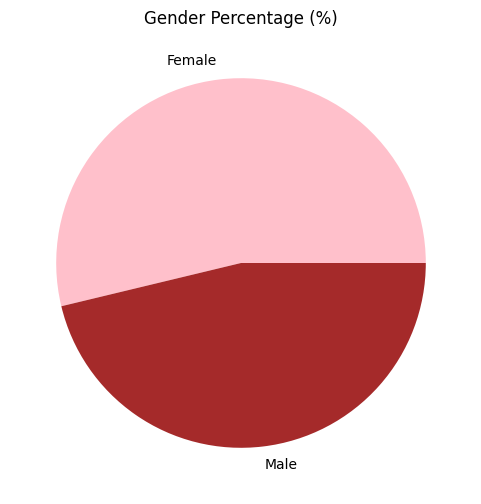

In [53]:
import matplotlib.pyplot as plt

Gender_Dic = {
    'Female': Data['gender'].value_counts().get(1, 0),
    'Male': Data['gender'].value_counts().get(2, 0)
}

PieFigGender=plt.figure(figsize=(6, 6))
plt.pie(Gender_Dic.values(),labels=Gender_Dic.keys(), colors=['pink','brown'])
plt.title('Gender Percentage (%)')
plt.show()
PieFigGender.savefig('PieFigGender.png', dpi=300,bbox_inches='tight')

In [39]:
Female=0
Male=0
for i in range(Data.shape[0]):
    if Data.iloc[i,5]==1:
        if Data.iloc[i,0]==1:
            Female=Female+1
        elif Data.iloc[i,0]==2:
            Male=Male+1

In [47]:
print(f'Number of all females who readmitted in "<30" are {Female}, which is {round(100*Female/(Female+Male),2)}% of all readmitted members.')
print(f'Number of all females who readmitted in "<30" are {Male}, which is {round(100*Male/(Female+Male),2)}% of all readmitted members.')

Number of all females who readmitted in "<30" are 6152, which is 54.17% of all readmitted members.
Number of all females who readmitted in "<30" are 5205, which is 45.83% of all readmitted members.


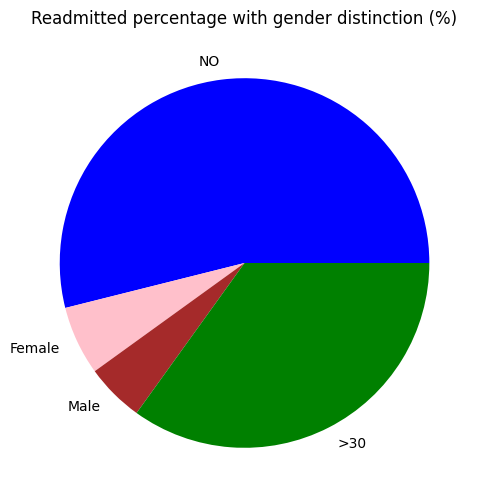

In [67]:
GenderReAdmit_Dic = {
    'NO': 54864,
    'Female': 6152,
    'Male': 5205,
    '>30': 35545
}

PieFigGenReAdm=plt.figure(figsize=(6, 6))
plt.pie(GenderReAdmit_Dic.values(),labels=GenderReAdmit_Dic.keys(), colors=['blue','pink','brown','green'])
plt.title('Readmitted percentage with gender distinction (%)')
plt.show()
PieFigGenReAdm.savefig('PieFigGenReAdm.png', dpi=300,bbox_inches='tight')

In [69]:
PieFigGenReAdm.savefig('PieFigGenReAdm.png', dpi=300,bbox_inches='tight')

In [37]:
print(Data)

        gender      age      diag_1         diag_2       diag_3  readmitted
0            1   [0-10)   endocrine          other        other           0
1            1  [10-20)   endocrine      endocrine    endocrine           2
2            1  [20-30)   pregnancy      endocrine        other           0
3            2  [30-40)  infectious      endocrine   cirulatory           0
4            2  [40-50)   neoplasms      neoplasms    endocrine           0
...        ...      ...         ...            ...          ...         ...
101761       2  [70-80)   endocrine         mental   cirulatory           2
101762       1  [80-90)   digestive      endocrine  ill-defined           0
101763       2  [70-80)  infectious  genitourinary       mental           0
101764       1  [80-90)      injury          blood       injury           0
101765       2  [70-80)   digestive      digestive  ill-defined           0

[101766 rows x 6 columns]


## Random Forest

In [1]:
import numpy as np
import pandas as pd

In [3]:
Data=pd.read_csv('Data.csv',low_memory=False)

In [5]:
print(Data)

        gender      age      diag_1         diag_2       diag_3  readmitted
0            1   [0-10)   endocrine          other        other           0
1            1  [10-20)   endocrine      endocrine    endocrine           2
2            1  [20-30)   pregnancy      endocrine        other           0
3            2  [30-40)  infectious      endocrine   cirulatory           0
4            2  [40-50)   neoplasms      neoplasms    endocrine           0
...        ...      ...         ...            ...          ...         ...
101761       2  [70-80)   endocrine         mental   cirulatory           2
101762       1  [80-90)   digestive      endocrine  ill-defined           0
101763       2  [70-80)  infectious  genitourinary       mental           0
101764       1  [80-90)      injury          blood       injury           0
101765       2  [70-80)   digestive      digestive  ill-defined           0

[101766 rows x 6 columns]


In [21]:
def DiagMap(Disease):
    try:
        Disease=str(Disease)
    except:
        return 19
    
    if     Disease=="infectious":
        return 1
    elif Disease=="neoplasms":
        return 2
    elif Disease=="endocrine":
        return 3
    elif Disease=="blood":
        return 4
    elif Disease=="mental":
        return 5
    elif Disease=="nervous":
        return 6
    elif Disease=="cirulatory":
        return 7
    elif Disease=="respiratory":
        return 8
    elif Disease=="digestive":
        return 9
    elif Disease=="genitourinary":
        return 10
    elif Disease=="pregnancy":
        return 11
    elif Disease=="skin":
        return 12
    elif Disease=="musculoskeletal":
        return 13
    elif Disease=="congenital":
        return 14
    elif Disease=="perinatal":
        return 15
    elif Disease=="ill-defined":
        return 16
    elif Disease=="injury":
        return 17
    else:
        return 18

In [23]:
Data['diag_1']=Data['diag_1'].apply(DiagMap)

In [25]:
Data['diag_2']=Data['diag_2'].apply(DiagMap)
Data['diag_3']=Data['diag_3'].apply(DiagMap)

In [29]:
Data['diag_1'].value_counts().get(18,0)

np.int64(1666)

In [17]:
def AgeMap(Age):
    try:
        Age=str(Age)
    except:
        return 12
    
    if   Age=="[0-10)":
        return 1
    elif Age=="[10-20)":
        return 2
    elif Age=="[20-30)":
        return 3
    elif Age=="[30-40)":
        return 4
    elif Age=="[40-50)":
        return 5
    elif Age=="[50-60)":
        return 6
    elif Age=="[60-70)":
        return 7
    elif Age=="[70-80)":
        return 8
    elif Age=="[80-90)":
        return 9
    elif Age=="[90-100)":
        return 10
    else:
        return 11
    

In [19]:
Data['age']=Data['age'].apply(AgeMap)

In [35]:
Data

,gender,age,diag_1,diag_2,diag_3,readmitted
0,1,1,3,18,18,0
1,1,2,3,3,3,2
2,1,3,11,3,18,0
3,2,4,1,3,7,0
4,2,5,2,2,3,0
...,...,...,...,...,...,...
101761,2,8,3,5,7,2
101762,1,9,9,3,16,0
101763,2,8,1,10,5,0
101764,1,9,17,4,17,0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [41]:
Xin = Data[['gender', 'age', 'diag_1', 'diag_2', 'diag_3']]   # input variables
Yout = Data['readmitted']                                      # target

In [119]:
# Training and Testing Data samples
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xin, Yout, test_size=0.1, random_state=42)

In [135]:
RanForModel = RandomForestClassifier(class_weight="balanced", random_state=42)

In [137]:
RanForModel.fit(Xtrain, Ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [139]:
Ypredicion = RanForModel.predict(Xtest)

In [59]:
Ypredicion

array([2, 0, 0, ..., 0, 0, 0], shape=(20354,))

In [141]:
Ytestt=Ytest

In [143]:
Ytestt = Ytestt.reset_index(drop=True)

In [145]:
Corrects=0
for i in range(len(Ypredicion)):
    if Ypredicion[i]==Ytestt[i]:
        Corrects=Corrects+1


In [147]:
Precision=Corrects/len(Ypredicion)
print(f'The precision of the Random Forest is: {round(Precision,4)}')

The precision of the Random Forest is: 0.3976


In [157]:
Data.head(2)

,gender,age,diag_1,diag_2,diag_3,readmitted
0,1,1,3,18,18,0
1,1,2,3,3,3,2


In [11]:
def ReAdmit2(Value):
    try:
        Value=float(Value)
    except:
        return 5
    
    if   Value==0:
        return 0
    elif Value==1:
        return 1
    elif Value==2:
        return 0

In [13]:
Data['readmitted']=Data['readmitted'].apply(ReAdmit2)

In [167]:
Data.head(2)

,gender,age,diag_1,diag_2,diag_3,readmitted
0,1,1,3,18,18,0
1,1,2,3,3,3,0


### Second Try

In [1]:
import pandas as pd
import numpy as np
Data=pd.read_csv('Data.csv',low_memory=False)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
Xin = Data[['gender', 'age', 'diag_1', 'diag_2', 'diag_3']]
Yout = Data['readmitted']     

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xin, Yout, test_size=0.1, random_state=42)

In [9]:
RanForModel = RandomForestClassifier(n_estimators=100, random_state=42)
#RanForModel = RandomForestClassifier(class_weight="balanced", random_state=42)
RanForModel = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

In [11]:
RanForModel.fit(Xtrain, Ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
Ypredicion = RanForModel.predict(Xtest)

In [15]:
Ytest = Ytest.reset_index(drop=True)

In [17]:
Corrects=0
for i in range(len(Ypredicion)):
    if Ypredicion[i]==Ytest[i]:
        Corrects=Corrects+1

In [19]:
Precision=Corrects/len(Ypredicion)
print(f'The precision of the Random Forest is: {round(Precision,4)}')

The precision of the Random Forest is: 0.6913


## XGBoost

In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import numpy as np
Data=pd.read_csv('Data.csv',low_memory=False)

In [5]:
Data=pd.read_csv('Data.csv',low_memory=False)

In [7]:
Xin = Data[['gender', 'age', 'diag_1', 'diag_2', 'diag_3']]
Yout = Data['readmitted']  

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xin, Yout, test_size=0.1, random_state=42, stratify=Yout)

In [11]:
XgbModel = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    #scale_pos_weight=(len(Yout) - sum(Yout)) / sum(Yout),
    random_state=42
)

In [13]:
XgbModel.fit(Xtrain, Ytrain)

C:\Users\cyrus\anaconda3\envs\sbert_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:29:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [15]:
Ypredicion = XgbModel.predict(Xtest)

In [17]:
Ytest = Ytest.reset_index(drop=True)

In [19]:
Corrects=0
for i in range(len(Ypredicion)):
    if Ypredicion[i]==Ytest[i]:
        Corrects=Corrects+1

In [21]:
Precision=Corrects/len(Ypredicion)
print(f'The precision of the Random Forest is: {round(Precision,4)}')

The precision of the Random Forest is: 0.8883


In [1]:
import pandas as pd
import numpy as np
Data=pd.read_csv('Data.csv',low_memory=False)

In [3]:
CorrMatrixVoc=np.corrcoef(Data.T)
print(CorrMatrixVoc.shape)


(6, 6)


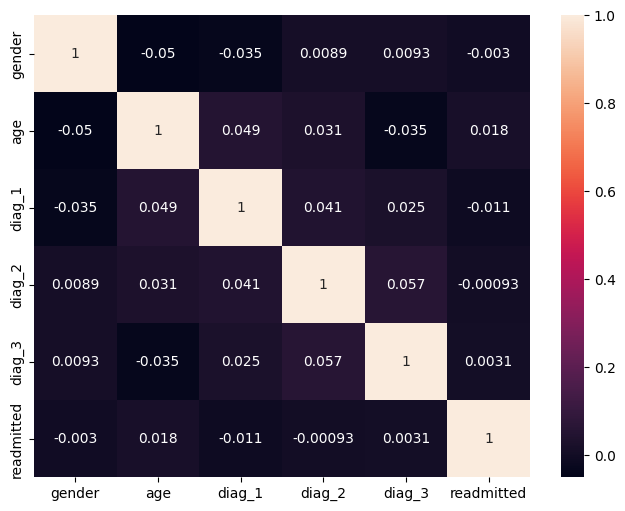

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt

FigCorr=plt.figure(figsize=(8,6))
labels=['gender', 'age', 'diag_1', 'diag_2', 'diag_3','readmitted']
sb.heatmap(CorrMatrixVoc,annot=True, xticklabels=labels, yticklabels=labels)
plt.show()
FigCorr.savefig('FigCorr.png', dpi=300,bbox_inches='tight')

In [ ]:
Xin = Data[[]]
Yout = Data[]  